# Simple Standardised Model
For this model, we standardise each feature by its observed mean and variance in the training data.

Data Obtained from the csv file created by 'n3060_std_constructor.py'

In [1]:
# imports and model specific settings
# perform imports
import numpy as np
import pandas as pd
from pathlib import Path

# standard libraries
import importlib, argparse, os.path, os, sys, time, sqlite3, subprocess, progressbar

# attempt to import the model itself
# Add the git root directory to python path
# unfortunately need to do this manually because Jupyter
# sets the current working directory to the location of the notebook .ipynb file
git_root = "/home/matthew/Documents/GapWatch"
model_module = "common.model.training.n3060_std.n3060_std"
data_path = "common/model/training/n3060_std/n3060_std.csv"
sys.path.insert(0,git_root)

# import the model
m = importlib.import_module(model_module)

# import the data
df = pd.read_csv(os.path.join(git_root,data_path))

headers = df.columns.values
print("Dataframe Header: \n{}".format(headers))

Dataframe Header: 
['Unnamed: 0' 'mean' 'var' 'kurt' 'skew' 'mfcc_0' 'mfcc_1' 'mfcc_2'
 'mfcc_3' 'mfcc_4' 'mfcc_5' 'mfcc_6' 'mfcc_7' 'mfcc_8' 'mfcc_9' 'label'
 'video_url' 'frame']


In [2]:
df.describe()

,Unnamed: 0,mean,var,kurt,skew,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,frame
count,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,39.528160,-0.238477,0.118463,0.397573,0.433629,576.183154,136.560847,-14.818961,25.195681,42.780337,-32.479231,48.624418,-20.300513,17.822842,13.905591,2814.545307
std,34.772855,0.118175,0.060151,0.800001,0.450872,118.080926,31.298254,15.092255,9.697514,7.148190,8.752125,8.312603,7.632645,4.657689,4.696807,2550.457979
min,0.000000,-0.834532,0.000000,-3.000000,-0.903216,-1131.370800,0.000000,-80.412834,-35.709873,0.000000,-84.040500,0.000000,-48.643963,-0.257894,-15.275062,1.000000
25%,13.000000,-0.329060,0.077736,-0.057538,0.102325,555.120363,117.799820,-26.161529,20.439959,39.302740,-37.815964,43.945953,-24.713694,14.922226,10.934662,696.250000
50%,27.000000,-0.239506,0.093107,0.324849,0.334934,573.546940,127.721733,-20.327230,26.094608,43.329270,-32.885578,49.833350,-20.156700,17.868564,14.054017,1897.000000
75%,62.000000,-0.150082,0.144982,0.775341,0.588491,611.142400,157.215962,-2.825818,31.707636,47.097092,-28.150843,53.998730,-16.155609,20.812623,16.960809,5061.000000
max,124.000000,0.610692,0.574506,28.257717,4.183293,1074.523000,235.732180,49.862366,61.529125,83.970160,19.114561,84.699810,23.527750,43.974335,34.956127,9000.000000


## Standardising

In [3]:
# select the X and y to be used for modeling
ml_df = df.copy() # make a copy
X_cols = headers[1:-3] # numeric features
y_cols = headers[-3] # "label"

X_mean = ml_df[X_cols].mean(axis=0)
X_std  = ml_df[X_cols].std(axis=0)

ml_df[X_cols] = (ml_df[X_cols]-X_mean)/X_std
ml_df.describe()

,Unnamed: 0,mean,var,kurt,skew,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,frame
count,7990.000000,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7.990000e+03,7990.000000
mean,39.528160,-4.759480e-15,-8.010725e-15,-2.013353e-15,5.944015e-15,2.845728e-17,-6.047172e-16,2.511355e-15,-6.011601e-15,-4.734580e-15,-1.711705e-14,2.301838e-14,3.165873e-15,-1.761861e-14,3.014693e-15,2814.545307
std,34.772855,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2550.457979
min,0.000000,-5.043829e+00,-1.969438e+00,-4.246961e+00,-2.965020e+00,-1.446088e+01,-4.363210e+00,-4.346194e+00,-6.280533e+00,-5.984779e+00,-5.891285e+00,-5.849481e+00,-3.713451e+00,-3.881911e+00,-6.212871e+00,1.000000
25%,13.000000,-7.665221e-01,-6.770927e-01,-5.688875e-01,-7.348069e-01,-1.783759e-01,-5.994273e-01,-7.515490e-01,-4.904063e-01,-4.865003e-01,-6.097641e-01,-5.628158e-01,-5.781981e-01,-6.227586e-01,-6.325424e-01,696.250000
50%,27.000000,-8.710229e-03,-4.215453e-01,-9.090462e-02,-2.188973e-01,-2.232549e-02,-2.824156e-01,-3.649733e-01,9.269665e-02,7.679332e-02,-4.642833e-02,1.454336e-01,1.884185e-02,9.816625e-03,3.160128e-02,1897.000000
75%,62.000000,7.479927e-01,4.408706e-01,4.722095e-01,3.434730e-01,2.960618e-01,6.599447e-01,7.946555e-01,6.715077e-01,6.038948e-01,4.945528e-01,6.465258e-01,5.430495e-01,6.419024e-01,6.504884e-01,5061.000000
max,124.000000,7.185683e+00,7.581660e+00,3.482514e+01,8.316469e+00,4.220325e+00,3.168590e+00,4.285730e+00,3.746676e+00,5.762273e+00,5.895001e+00,4.339843e+00,5.742212e+00,5.614693e+00,4.481883e+00,9000.000000


# Models
Will consider the following models:
1. Logistic Regression
2. Decision Tree Classifier

## Train-Valid-Test Split
Split the frames by `video_url` as this will ensure that the unseen data doesn't contain frames from videos that the model has been exposed to. This is particularly important because some of the features are video dependent (eg. lighting, weather etc) and the model should not have seen any of those criteria if the frame is truly "unseen".

In [5]:
# get the video urls to determine unique videos
video_urls = ml_df.loc[:,headers[-2]].unique()

# randomly sample
np.random.seed(0)
train_prop = 0.5 # save half the videos for validation run
val_prop   = 0.25
train_idx = np.random.choice(len(video_urls),int(np.floor(train_prop*len(video_urls))),
                           replace=False)
val_idx_full   = np.setdiff1d(np.arange(len(video_urls)), train_idx)

val_idx = np.random.choice(val_idx_full,int(np.floor(val_prop*len(video_urls))),
                           replace=False)
test_idx = np.setdiff1d(val_idx_full, val_idx)

# find the videos corresponding to these indices
train_videos = video_urls[train_idx]
val_videos   = video_urls[val_idx]
test_videos   = video_urls[test_idx]


ml_train = ml_df.loc[ml_df[headers[-2]].isin(train_videos),:]
ml_val   = ml_df.loc[ml_df[headers[-2]].isin(val_videos)  ,:]
ml_test  = ml_df.loc[ml_df[headers[-2]].isin(test_videos) ,:]

print("Train set shape: ", ml_train.shape)
print("Validation set shape: ",ml_val.shape)
print("Test set shape: ",ml_test.shape)

Train set shape:  (4085, 18)
Validation set shape:  (2015, 18)
Test set shape:  (1890, 18)


## Logistic Regression
### Training

In [6]:
# load scikit learn logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import confusion_matrix

# hide convergence warnings
import warnings
warnings.filterwarnings("ignore")

# show progress
import progressbar

X = ml_train[X_cols]
y = np.where(ml_train[y_cols]=="Danger",1,0) # 1: Danger, 0 No_Danger

def score_model(clf, X_test, y_test):
    # get predictions
    y_hat = clf.predict(X_test)
    # get the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
    # get accuracy
    acc  = (tn+tp)/(tn+fp+fn+tp)
    # get sensitivity
    sens = tp/(tp+fn)
    # get specificity
    spec = tn/(tn+fp)
    return acc, sens, spec
    

# perform bootstrapping to observe which coefficients can be dropped
b = 200
n_train = 0.5 # train on half, test on half
params = np.zeros((b,1+len(X_cols))) # storage for coefficeints
# storage for accuracy, sensitivity, specificity (for both train and test to check for overfitting)
scores = np.zeros((b, 6))
bs = ShuffleSplit(n_splits = b,
                 random_state=0,
                 test_size=0.5)
iter = 0
with progressbar.ProgressBar(max_value=b) as bar:
    for train_index, test_index in bs.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        # fit the classifier
        clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
        # record the model parameters
        params[iter,:] = np.squeeze(np.hstack((clf.intercept_[:,None], clf.coef_)))
        # score the model on train data first
        scores[iter,:3] = score_model(clf, X_train, y_train)
        # score the model on test data
        scores[iter,3:] = score_model(clf, X_test, y_test)
        # iteration counter
        bar.update(iter)
        iter +=1

100% (200 of 200) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


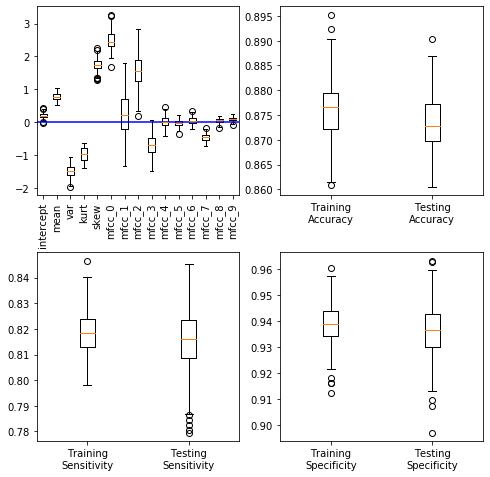

In [7]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# custom helper scripts
import common.model.training.training_utils as tu

# boxplot of the parameters
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(2, 2, 1)
ax.boxplot(params)
ax.axhline(y=0, c="b")
x_ax_labs = np.insert(X_cols,0,"intercept") 
ax.set_xticklabels(x_ax_labs, rotation = 90)


# boxplot of the scorings, grouped by type if possible
# reconfigure so that the 
ax = fig.add_subplot(2, 2, 2)
ax.boxplot(scores[:,[0,3]])
ax.set_xticklabels(["Training\nAccuracy", "Testing\nAccuracy"])

ax = fig.add_subplot(2, 2, 3)
ax.boxplot(scores[:,[1,4]])
ax.set_xticklabels(["Training\nSensitivity", "Testing\nSensitivity"])

ax = fig.add_subplot(2, 2, 4)
ax.boxplot(scores[:,[2,5]])
ax.set_xticklabels(["Training\nSpecificity", "Testing\nSpecificity"])

plt.subplots_adjust(hspace=0.3)
plt.savefig("lr.pdf")
plt.show()

### Drop Noisy Variables
Any variable with a coefficient not significantly different to zero (ie confidence interval overlaps with zero) should be removed.

Consider a 90% confidence interval.


In [22]:
# We cannot drop the intercept!
up = np.percentile(params[:,1:], 95, axis=0)
down = np.percentile(params[:,1:], 5, axis=0)
keep = np.where((up>0)&(down<0),False, True)
X_cols_1 = X_cols[keep]
print(X_cols_1)

['mean' 'var' 'kurt' 'skew' 'mfcc_0' 'mfcc_2' 'mfcc_3' 'mfcc_7']


In [24]:
X = ml_train[X_cols_1]
y = np.where(ml_train[y_cols]=="Danger",1,0) # 1: Danger, 0 No_Danger
    

# perform bootstrapping to observe which coefficients can be dropped
b = 200
n_train = 0.5 # train on half, test on half
params = np.zeros((b,1+len(X_cols_1))) # storage for coefficeints
# storage for accuracy, sensitivity, specificity (for both train and test to check for overfitting)
scores = np.zeros((b, 6))
bs = ShuffleSplit(n_splits = b,
                 random_state=0,
                 test_size=0.5)
iter = 0
with progressbar.ProgressBar(max_value=b) as bar:
    for train_index, test_index in bs.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        # fit the classifier
        clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
        # record the model parameters
        params[iter,:] = np.squeeze(np.hstack((clf.intercept_[:,None], clf.coef_)))
        # score the model on train data first
        scores[iter,:3] = score_model(clf, X_train, y_train)
        # score the model on test data
        scores[iter,3:] = score_model(clf, X_test, y_test)
        # iteration counter
        bar.update(iter)
        iter +=1

100% (200 of 200) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


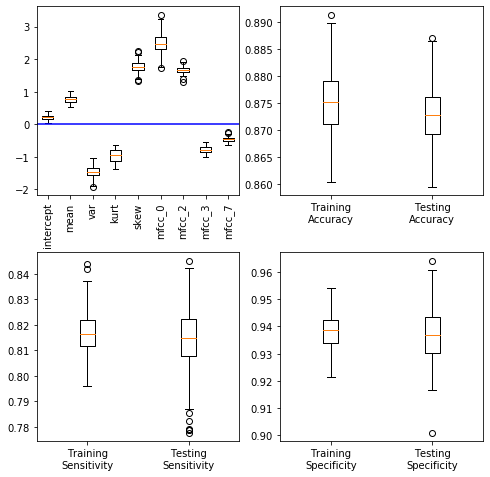

In [25]:
# boxplot of the parameters
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(2, 2, 1)
ax.boxplot(params)
ax.axhline(y=0, c="b")
x_ax_labs = np.insert(X_cols_1,0,"intercept") 
ax.set_xticklabels(x_ax_labs, rotation = 90)


# boxplot of the scorings, grouped by type if possible
# reconfigure so that the 
ax = fig.add_subplot(2, 2, 2)
ax.boxplot(scores[:,[0,3]])
ax.set_xticklabels(["Training\nAccuracy", "Testing\nAccuracy"])

ax = fig.add_subplot(2, 2, 3)
ax.boxplot(scores[:,[1,4]])
ax.set_xticklabels(["Training\nSensitivity", "Testing\nSensitivity"])

ax = fig.add_subplot(2, 2, 4)
ax.boxplot(scores[:,[2,5]])
ax.set_xticklabels(["Training\nSpecificity", "Testing\nSpecificity"])

plt.subplots_adjust(hspace=0.3)
plt.savefig("lr.pdf")
plt.show()

## Logistic Regression
### Threshold Selection

Threshold to achieve Sensitivity of 0.95: 0.10690739158305557
     pred_neg  pred_pos
neg       256       759
pos        50       950
Sensitivity (Recall): 0.95
Specificity         : 0.2522167487684729


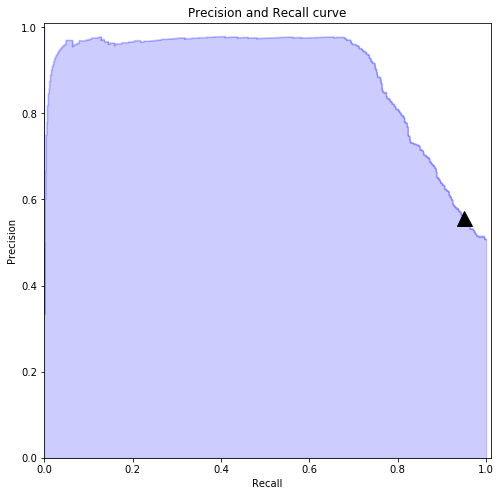

In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

X_train, X_test = ml_train[X_cols_1], ml_val[X_cols_1]
y_train, y_test = np.where(ml_train[y_cols]=="Danger",1,0), np.where(ml_val[y_cols]=="Danger",1,0)
clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
# get y_hat
y_hat = clf.predict_proba(X_test)[:, 1]

p, r, thresholds = tu.precision_recall_curve(y_test, y_hat)

target_r = 0.95
t_opt = thresholds[np.argmin(np.abs(r-target_r))]
print("Threshold to achieve Sensitivity of {}: {}".format(target_r, t_opt))

tu.precision_recall_threshold(p, r, thresholds, y_hat, y_test, t= t_opt)

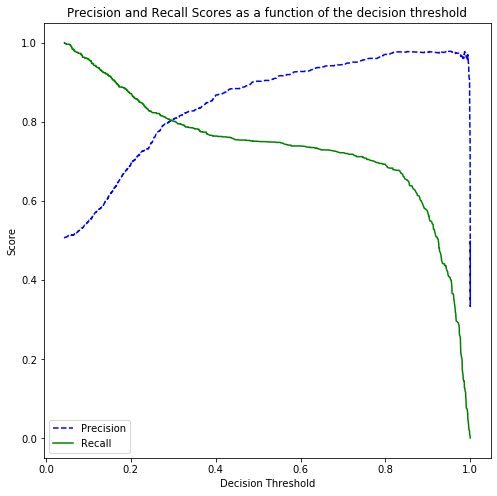

In [28]:
tu.plot_precision_recall_vs_threshold(p, r, thresholds)

Area under ROC curve: 0.8767399014778325


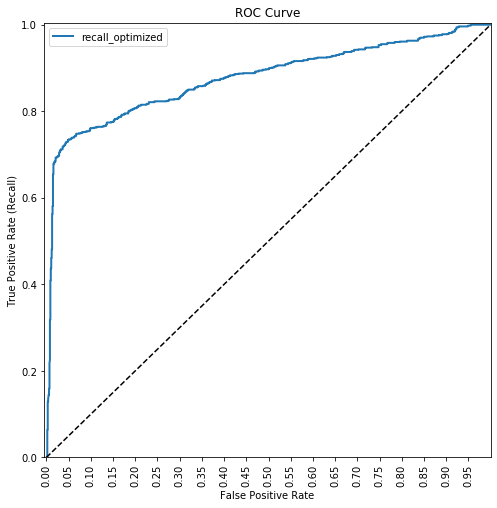

In [30]:
fpr, tpr, auc_thresholds = tu.roc_curve(y_test, y_hat)
print("Area under ROC curve: {}".format(auc(fpr, tpr))) # AUC of ROC
tu.plot_roc_curve(fpr, tpr, 'recall_optimized')

## Decision Tree
### Training

In [45]:
# load scikit learn logistic regression
from sklearn.tree import DecisionTreeClassifier

# parallel
from multiprocessing import Pool
from itertools import repeat

X = ml_train[X_cols]
y = np.where(ml_train[y_cols]=="Danger",1,0) # 1: Danger, 0 No_Danger

# perform bootstrapping to observe which coefficients can be dropped
b = 200
n_train = 0.5 # train on half, test on half
params = np.zeros((b,1+len(X_cols))) # storage for coefficeints
# storage for accuracy, sensitivity, specificity (for both train and test to check for overfitting)
nk = 10 # number of different depths to try
depths = np.arange(nk)+1 # zero depth tree doesnt make sense

scores = np.zeros((b, nk, 6))
bs = ShuffleSplit(n_splits = b,
                 random_state=0,
                 test_size=0.5)
iter = 0
X_tr, X_te, y_tr, y_te = [], [], [], [] # storage lists
for train_index, test_index in bs.split(X):    
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    X_tr.append(X_train)
    X_te.append(X_test)
    y_tr.append(y_train)
    y_te.append(y_test)
# evaluate performance in parallel
def return_scores(split, depths):
    train_index = split[0]
    test_index  = split[1]
    scores = np.zeros((nk,6))
    for i in range(nk):
        # fit the classifier
        clf = DecisionTreeClassifier(random_state=0,
                        max_depth=depths[i]).fit(X_train,y_train)
        # score the model on train data first
        scores[i,:3] = score_model(clf, X_train, y_train)
        # score the model on test data
        scores[i,3:] = score_model(clf, X_test, y_test)
    return scores
with Pool(os.cpu_count()) as pool:
    res = pool.starmap(return_scores,
                        zip(bs.split(X),
                            repeat(depths)))
scores = np.array(res)

In [51]:
up.shape

(10, 6)

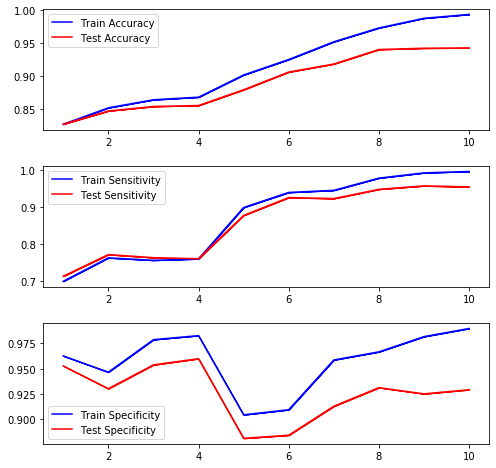

In [57]:
# get the confidence intervals
up = np.percentile(scores, 95, axis=0)
med = np.percentile(scores, 50, axis=0)
lo = np.percentile(scores, 5, axis=0)

# Plot 1: Accuracy with depth
metric = "Accuracy"
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(3, 1, 1)
ax.fill_between(depths, up[:,0], lo[:,0], color="b")
ax.plot(depths, med[:,0], c="b", label="Train {}".format(metric))
ax.fill_between(depths, up[:,3], lo[:,3], color="r")
ax.plot(depths, med[:,3], c="r", label="Test {}".format(metric))
ax.legend()


# Plot 2: Sensitivity with depth
metric = "Sensitivity"
ax = fig.add_subplot(3, 1, 2)
ax.fill_between(depths, up[:,1], lo[:,1], color="b")
ax.plot(depths, med[:,1], c="b", label="Train {}".format(metric))
ax.fill_between(depths, up[:,4], lo[:,4], color="r")
ax.plot(depths, med[:,4], c="r", label="Test {}".format(metric))
ax.legend()

# Plot 3: Specificity with depth
metric = "Specificity"
ax = fig.add_subplot(3, 1, 3)
ax.fill_between(depths, up[:,2], lo[:,2], color="b")
ax.plot(depths, med[:,2], c="b", label="Train {}".format(metric))
ax.fill_between(depths, up[:,5], lo[:,5], color="r")
ax.plot(depths, med[:,5], c="r", label="Test {}".format(metric))
ax.legend()


plt.subplots_adjust(hspace=0.3)
plt.savefig("dt.pdf")
plt.show()


## Decision Tree
### Threshold Selection

Threshold to achieve Sensitivity of 0.95: 0.01160092807424594
     pred_neg  pred_pos
neg       211       804
pos        72       928
Sensitivity (Recall): 0.928
Specificity         : 0.20788177339901479


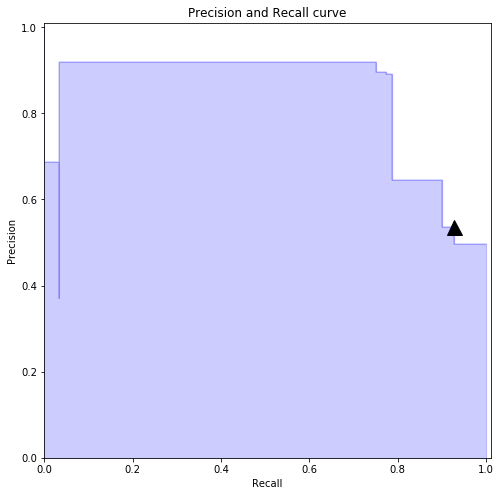

In [58]:
X_train, X_test = ml_train[X_cols], ml_val[X_cols]
y_train, y_test = np.where(ml_train[y_cols]=="Danger",1,0), np.where(ml_val[y_cols]=="Danger",1,0)
clf = DecisionTreeClassifier(random_state=0,
                        max_depth=6).fit(X_train,y_train)
# get y_hat
y_hat = clf.predict_proba(X_test)[:, 1]

p, r, thresholds = tu.precision_recall_curve(y_test, y_hat)

target_r = 0.95
t_opt = thresholds[np.argmin(np.abs(r-target_r))]
print("Threshold to achieve Sensitivity of {}: {}".format(target_r, t_opt))

tu.precision_recall_threshold(p, r, thresholds, y_hat, y_test, t= t_opt)

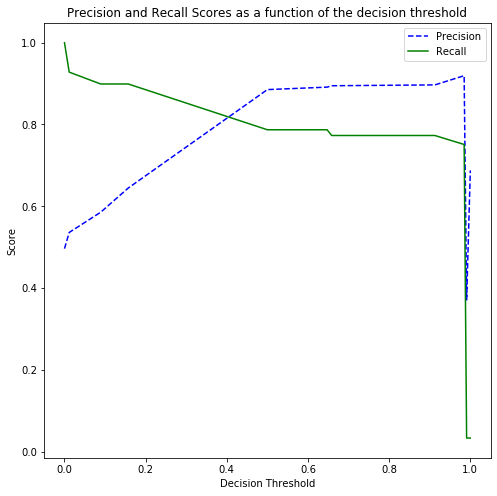

In [59]:
tu.plot_precision_recall_vs_threshold(p, r, thresholds)

Area under ROC curve: 0.8355408866995073


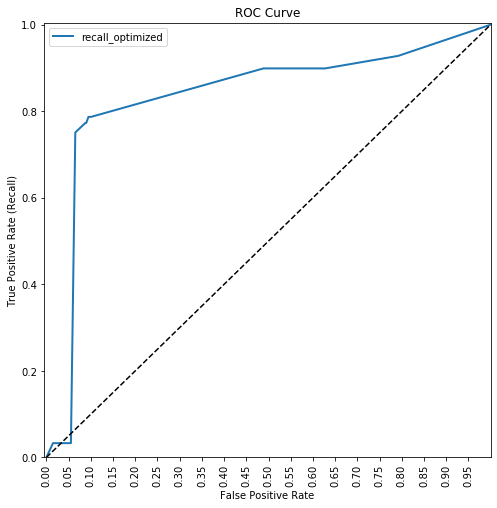

In [60]:
fpr, tpr, auc_thresholds = tu.roc_curve(y_test, y_hat)
print("Area under ROC curve: {}".format(auc(fpr, tpr))) # AUC of ROC
tu.plot_roc_curve(fpr, tpr, 'recall_optimized')

In [71]:
# view the decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_cols,
                                class_names=["Danger", "No Danger"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("dt_view") 

'dt_view.pdf'

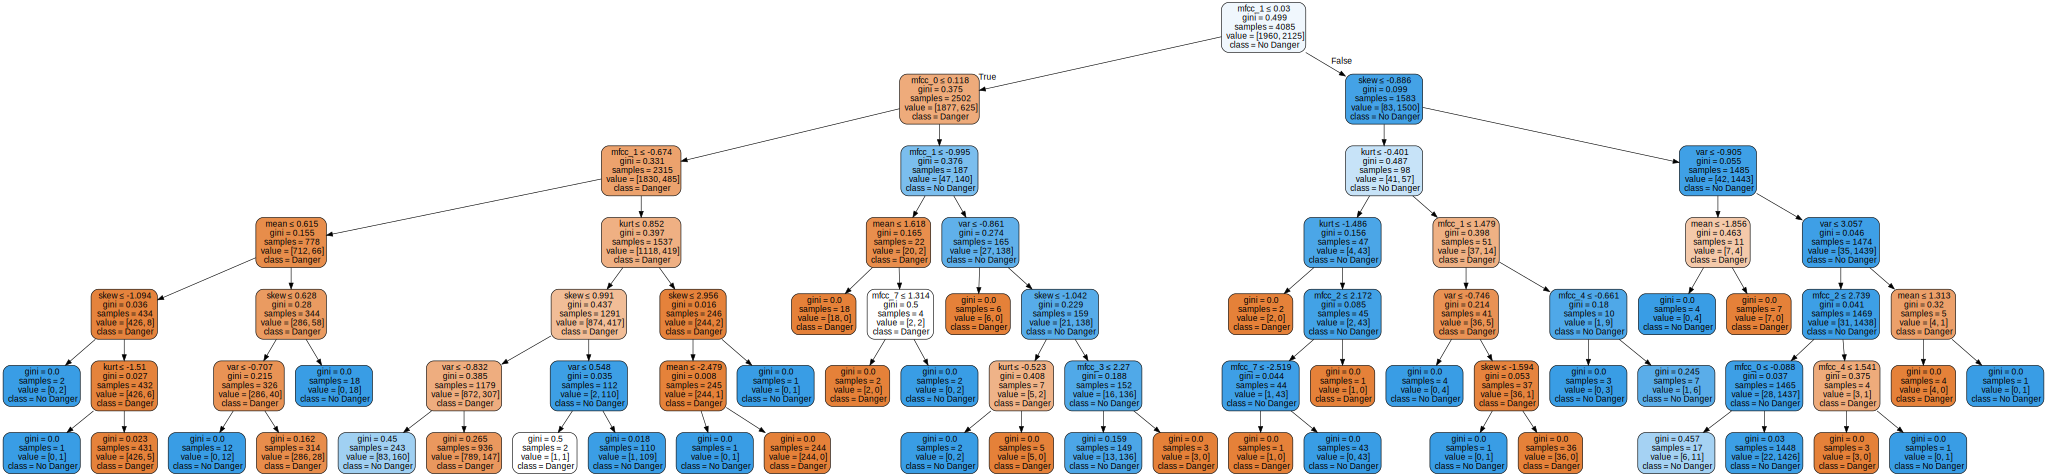

In [72]:
graph

In [70]:
y_test.mean()

0.49627791563275436